**In this notebook, we will create models for both BATCH REGRESSIONS and CLASSIFICATIONS. The steps we will follow are:**

**1)Importing data from Yahoo Finance**

**2)Cleaning and rearranging the data for easy analysis**

**3) Applying KNN and displaying results based on different features (matrix included at the end of the notebook)**

**4) Applying Gradient Boosting and displaying results based on different features (matrix included at the end of the notebook)**

**Remark: Utilizing the AROON indicator, imported from talib, to determine the strength of a trend. We will observe that in several cases, better results are obtained with this feature.**

**It is important to note that the results have been classified as follows: 0 for negative returns, 1 for small returns and 2 for very good returns.**

**In the case of a strategy, we will buy if we get very good returns. Using the assumption of no transaction costs, we will see that we will get some very good results.**

**We work with multiple stocks from various countries and industries to avoid analyzing stocks that are too correlated.**

**Good lecture**

LINK TO THE RESULTS OF KNN (end of the notebook)

https://colab.research.google.com/drive/14_83c9HQftz_e5YerOrZukFG_LbmYtoS?authuser=1#scrollTo=yGOib8jYQ1uq&line=1&uniqifier=1

LINK TO THE RESULTS OF GRADIENT BOOSTING (end of the notebook)

https://colab.research.google.com/drive/14_83c9HQftz_e5YerOrZukFG_LbmYtoS?authuser=1#scrollTo=cq4uqvCXRW4A&line=1&uniqifier=1

In [ ]:
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Here We are getting Facebook financial information
# We need to pass FB as argument for that
ticker_list=["META","BNP.PA","BABA","2222.SR","FCAU.VI"]
#"GAZP.ME" supp because of lack of data 
dict_df={}
for i in ticker_list: 
  tick = yf.Ticker(i)
  df=tick.history(start="2019-12-15")
  df1 = df.drop(["Dividends","Stock Splits"],axis=1)
  df1["Mid"] = (df1["High"] + df1["Low"])/2
  df1["return"]=df1["Close"].pct_change() * 100
 
  dict_df[i]=df1
dict_df["META"]

,Open,High,Low,Close,Volume,Mid,return
Date,,,,,,,
2019-12-16 00:00:00-05:00,195.270004,199.119995,194.809998,197.919998,14911500,196.964996,NaN
2019-12-17 00:00:00-05:00,198.839996,199.000000,196.130005,198.389999,10175700,197.565002,0.237470
2019-12-18 00:00:00-05:00,200.089996,204.300003,200.089996,202.500000,23274400,202.195000,2.071677
2019-12-19 00:00:00-05:00,202.779999,206.300003,202.509995,206.059998,16514600,204.404999,1.758023
2019-12-20 00:00:00-05:00,207.479996,207.710007,203.429993,206.300003,27306900,205.570000,0.116474
...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,131.160004,132.949997,129.279999,129.470001,26649100,131.114998,-0.423014
2023-01-10 00:00:00-05:00,127.269997,133.440002,127.150002,132.990005,28684400,130.295002,2.718780
2023-01-11 00:00:00-05:00,130.960007,133.850006,130.339996,132.889999,25423000,132.095001,-0.075198


[*********************100%***********************]  1 of 1 completed


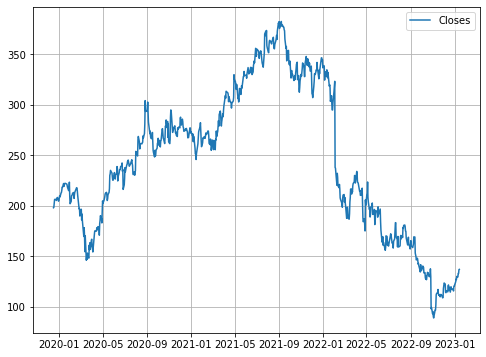

In [ ]:
from pandas_datareader import data as pdr
yf.pdr_override()

# Download META data for the past month
df = pdr.get_data_yahoo("META")

closes = dict_df["META"]["Close"]
returns = dict_df["META"]["return"][1:]

fig, ax = plt.subplots(figsize =(8,6))
ax.plot(closes, label="Closes")

ax.legend()
plt.grid()
plt.show()

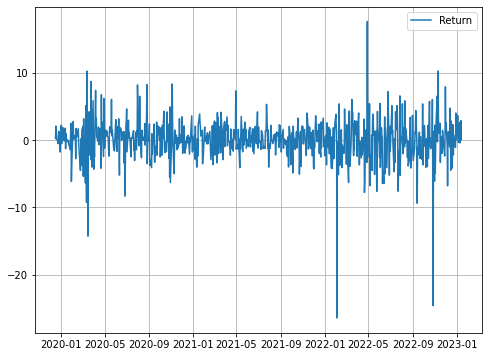

In [ ]:
fig, ax = plt.subplots(figsize =(8,6))
ax.plot(returns, label="Return")

ax.legend()
plt.grid()
plt.show()

In [ ]:
df = dict_df["META"]['Close'].pct_change() * 100
df

Date
2019-12-16 00:00:00-05:00         NaN
2019-12-17 00:00:00-05:00    0.237470
2019-12-18 00:00:00-05:00    2.071677
2019-12-19 00:00:00-05:00    1.758023
2019-12-20 00:00:00-05:00    0.116474
                               ...   
2023-01-09 00:00:00-05:00   -0.423014
2023-01-10 00:00:00-05:00    2.718780
2023-01-11 00:00:00-05:00   -0.075198
2023-01-12 00:00:00-05:00    2.874563
2023-01-13 00:00:00-05:00    0.197490
Name: Close, Length: 776, dtype: float64

In [ ]:
df = df.rename('Today')
df

Date
2019-12-16 00:00:00-05:00         NaN
2019-12-17 00:00:00-05:00    0.237470
2019-12-18 00:00:00-05:00    2.071677
2019-12-19 00:00:00-05:00    1.758023
2019-12-20 00:00:00-05:00    0.116474
                               ...   
2023-01-09 00:00:00-05:00   -0.423014
2023-01-10 00:00:00-05:00    2.718780
2023-01-11 00:00:00-05:00   -0.075198
2023-01-12 00:00:00-05:00    2.874563
2023-01-13 00:00:00-05:00    0.197490
Name: Today, Length: 776, dtype: float64

In [ ]:
df = df.reset_index()
df

,Date,Today
0,2019-12-16 00:00:00-05:00,NaN
1,2019-12-17 00:00:00-05:00,0.237470
2,2019-12-18 00:00:00-05:00,2.071677
3,2019-12-19 00:00:00-05:00,1.758023
4,2019-12-20 00:00:00-05:00,0.116474
...,...,...
771,2023-01-09 00:00:00-05:00,-0.423014
772,2023-01-10 00:00:00-05:00,2.718780
773,2023-01-11 00:00:00-05:00,-0.075198
774,2023-01-12 00:00:00-05:00,2.874563


In [ ]:
dict_df['META']

,Open,High,Low,Close,Volume,Mid,return
Date,,,,,,,
2019-12-16 00:00:00-05:00,195.270004,199.119995,194.809998,197.919998,14911500,196.964996,NaN
2019-12-17 00:00:00-05:00,198.839996,199.000000,196.130005,198.389999,10175700,197.565002,0.237470
2019-12-18 00:00:00-05:00,200.089996,204.300003,200.089996,202.500000,23274400,202.195000,2.071677
2019-12-19 00:00:00-05:00,202.779999,206.300003,202.509995,206.059998,16514600,204.404999,1.758023
2019-12-20 00:00:00-05:00,207.479996,207.710007,203.429993,206.300003,27306900,205.570000,0.116474
...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,131.160004,132.949997,129.279999,129.470001,26649100,131.114998,-0.423014
2023-01-10 00:00:00-05:00,127.269997,133.440002,127.150002,132.990005,28684400,130.295002,2.718780
2023-01-11 00:00:00-05:00,130.960007,133.850006,130.339996,132.889999,25423000,132.095001,-0.075198


In [ ]:
for i in range(1,6):
  df['Lag ' + str(i) ] = df['Today'].shift(i)
df 

,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5
0,2019-12-16 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-17 00:00:00-05:00,0.237470,NaN,NaN,NaN,NaN,NaN
2,2019-12-18 00:00:00-05:00,2.071677,0.237470,NaN,NaN,NaN,NaN
3,2019-12-19 00:00:00-05:00,1.758023,2.071677,0.237470,NaN,NaN,NaN
4,2019-12-20 00:00:00-05:00,0.116474,1.758023,2.071677,0.237470,NaN,NaN
...,...,...,...,...,...,...,...
771,2023-01-09 00:00:00-05:00,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.066518
772,2023-01-10 00:00:00-05:00,2.718780,-0.423014,2.426345,-0.337599,2.108389,3.656309
773,2023-01-11 00:00:00-05:00,-0.075198,2.718780,-0.423014,2.426345,-0.337599,2.108389
774,2023-01-12 00:00:00-05:00,2.874563,-0.075198,2.718780,-0.423014,2.426345,-0.337599


In [ ]:
df['Volume'] = dict_df['META'].Volume.shift(1).values/1000_000_000
df

,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume
0,2019-12-16 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-17 00:00:00-05:00,0.237470,NaN,NaN,NaN,NaN,NaN,0.014911
2,2019-12-18 00:00:00-05:00,2.071677,0.237470,NaN,NaN,NaN,NaN,0.010176
3,2019-12-19 00:00:00-05:00,1.758023,2.071677,0.237470,NaN,NaN,NaN,0.023274
4,2019-12-20 00:00:00-05:00,0.116474,1.758023,2.071677,0.237470,NaN,NaN,0.016515
...,...,...,...,...,...,...,...,...
771,2023-01-09 00:00:00-05:00,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.066518,0.027568
772,2023-01-10 00:00:00-05:00,2.718780,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.026649
773,2023-01-11 00:00:00-05:00,-0.075198,2.718780,-0.423014,2.426345,-0.337599,2.108389,0.028684
774,2023-01-12 00:00:00-05:00,2.874563,-0.075198,2.718780,-0.423014,2.426345,-0.337599,0.025423


In [ ]:
df = df.dropna()
df

,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume
6,2019-12-24 00:00:00-05:00,-0.514113,-0.058173,0.116474,1.758023,2.071677,0.237470,0.013349
7,2019-12-26 00:00:00-05:00,1.301676,-0.514113,-0.058173,0.116474,1.758023,2.071677,0.006046
8,2019-12-27 00:00:00-05:00,0.149195,1.301676,-0.514113,-0.058173,0.116474,1.758023,0.009351
9,2019-12-30 00:00:00-05:00,-1.773187,0.149195,1.301676,-0.514113,-0.058173,0.116474,0.010284
10,2019-12-31 00:00:00-05:00,0.410937,-1.773187,0.149195,1.301676,-0.514113,-0.058173,0.010524
...,...,...,...,...,...,...,...,...
771,2023-01-09 00:00:00-05:00,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.066518,0.027568
772,2023-01-10 00:00:00-05:00,2.718780,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.026649
773,2023-01-11 00:00:00-05:00,-0.075198,2.718780,-0.423014,2.426345,-0.337599,2.108389,0.028684
774,2023-01-12 00:00:00-05:00,2.874563,-0.075198,2.718780,-0.423014,2.426345,-0.337599,0.025423


In [ ]:
df['Direction'] =  [1 if i > 0 else 0 for i in df['Today']]

<ipython-input-404-23a10b5f166a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Direction'] =  [1 if i > 0 else 0 for i in df['Today']]


In [ ]:
# pip install statsmodels

In [ ]:
import statsmodels.api as sm
df = sm.add_constant(df)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
df

,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
6,1.0,2019-12-24 00:00:00-05:00,-0.514113,-0.058173,0.116474,1.758023,2.071677,0.237470,0.013349,0
7,1.0,2019-12-26 00:00:00-05:00,1.301676,-0.514113,-0.058173,0.116474,1.758023,2.071677,0.006046,1
8,1.0,2019-12-27 00:00:00-05:00,0.149195,1.301676,-0.514113,-0.058173,0.116474,1.758023,0.009351,1
9,1.0,2019-12-30 00:00:00-05:00,-1.773187,0.149195,1.301676,-0.514113,-0.058173,0.116474,0.010284,0
10,1.0,2019-12-31 00:00:00-05:00,0.410937,-1.773187,0.149195,1.301676,-0.514113,-0.058173,0.010524,1
...,...,...,...,...,...,...,...,...,...,...
771,1.0,2023-01-09 00:00:00-05:00,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.066518,0.027568,0
772,1.0,2023-01-10 00:00:00-05:00,2.718780,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.026649,1
773,1.0,2023-01-11 00:00:00-05:00,-0.075198,2.718780,-0.423014,2.426345,-0.337599,2.108389,0.028684,0
774,1.0,2023-01-12 00:00:00-05:00,2.874563,-0.075198,2.718780,-0.423014,2.426345,-0.337599,0.025423,1


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2023-01-15 17:55:44--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-01-15 17:55:44--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-01-15 17:55:44--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [ ]:
talib.get_function_groups()['Momentum Indicators']

['ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'BOP',
 'CCI',
 'CMO',
 'DX',
 'MACD',
 'MACDEXT',
 'MACDFIX',
 'MFI',
 'MINUS_DI',
 'MINUS_DM',
 'MOM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'ROC',
 'ROCP',
 'ROCR',
 'ROCR100',
 'RSI',
 'STOCH',
 'STOCHF',
 'STOCHRSI',
 'TRIX',
 'ULTOSC',
 'WILLR']

In [ ]:
import talib
aroon = talib.AROONOSC(dict_df['META']['High'], dict_df['META']['Low'], timeperiod = 7)
#aroon.head(10)

In [ ]:
#CAR TIME PERIOD = 7 DONC 7 PREMIERE VALEURS = NAAN 
#aroon = aroon[7:] 

In [ ]:
aroon

Date
2019-12-26 00:00:00-05:00     71.428571
2019-12-27 00:00:00-05:00    100.000000
2019-12-30 00:00:00-05:00     85.714286
2019-12-31 00:00:00-05:00     71.428571
2020-01-02 00:00:00-05:00    100.000000
                                ...    
2023-01-09 00:00:00-05:00    100.000000
2023-01-10 00:00:00-05:00    100.000000
2023-01-11 00:00:00-05:00    100.000000
2023-01-12 00:00:00-05:00    100.000000
2023-01-13 00:00:00-05:00     71.428571
Length: 769, dtype: float64

In [ ]:
#POUR AJUSTER PAR RAPPORT A AROON
#df = df[1:]

In [ ]:
#df = df[1:]
df

,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
7,1.0,2019-12-26 00:00:00-05:00,1.301676,-0.514113,-0.058173,0.116474,1.758023,2.071677,0.006046,1
8,1.0,2019-12-27 00:00:00-05:00,0.149195,1.301676,-0.514113,-0.058173,0.116474,1.758023,0.009351,1
9,1.0,2019-12-30 00:00:00-05:00,-1.773187,0.149195,1.301676,-0.514113,-0.058173,0.116474,0.010284,0
10,1.0,2019-12-31 00:00:00-05:00,0.410937,-1.773187,0.149195,1.301676,-0.514113,-0.058173,0.010524,1
11,1.0,2020-01-02 00:00:00-05:00,2.207064,0.410937,-1.773187,0.149195,1.301676,-0.514113,0.008953,1
...,...,...,...,...,...,...,...,...,...,...
771,1.0,2023-01-09 00:00:00-05:00,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.066518,0.027568,0
772,1.0,2023-01-10 00:00:00-05:00,2.718780,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.026649,1
773,1.0,2023-01-11 00:00:00-05:00,-0.075198,2.718780,-0.423014,2.426345,-0.337599,2.108389,0.028684,0
774,1.0,2023-01-12 00:00:00-05:00,2.874563,-0.075198,2.718780,-0.423014,2.426345,-0.337599,0.025423,1


In [ ]:
df['aroon'] = np.array(aroon.values)
#df = df[2:]
df.index = np.arange(len(df))
#np.array(aroon.values)

<ipython-input-413-cc66b9490029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aroon'] = np.array(aroon.values)


In [ ]:
df

,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction,aroon
0,1.0,2019-12-26 00:00:00-05:00,1.301676,-0.514113,-0.058173,0.116474,1.758023,2.071677,0.006046,1,71.428571
1,1.0,2019-12-27 00:00:00-05:00,0.149195,1.301676,-0.514113,-0.058173,0.116474,1.758023,0.009351,1,100.000000
2,1.0,2019-12-30 00:00:00-05:00,-1.773187,0.149195,1.301676,-0.514113,-0.058173,0.116474,0.010284,0,85.714286
3,1.0,2019-12-31 00:00:00-05:00,0.410937,-1.773187,0.149195,1.301676,-0.514113,-0.058173,0.010524,1,71.428571
4,1.0,2020-01-02 00:00:00-05:00,2.207064,0.410937,-1.773187,0.149195,1.301676,-0.514113,0.008953,1,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
764,1.0,2023-01-09 00:00:00-05:00,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.066518,0.027568,0,100.000000
765,1.0,2023-01-10 00:00:00-05:00,2.718780,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.026649,1,100.000000
766,1.0,2023-01-11 00:00:00-05:00,-0.075198,2.718780,-0.423014,2.426345,-0.337599,2.108389,0.028684,0,100.000000
767,1.0,2023-01-12 00:00:00-05:00,2.874563,-0.075198,2.718780,-0.423014,2.426345,-0.337599,0.025423,1,100.000000


**KNN AND GRADIENT BOOSTING MODELS** 

In [ ]:
df

,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction,aroon
0,1.0,2019-12-26 00:00:00-05:00,1.301676,-0.514113,-0.058173,0.116474,1.758023,2.071677,0.006046,1,71.428571
1,1.0,2019-12-27 00:00:00-05:00,0.149195,1.301676,-0.514113,-0.058173,0.116474,1.758023,0.009351,1,100.000000
2,1.0,2019-12-30 00:00:00-05:00,-1.773187,0.149195,1.301676,-0.514113,-0.058173,0.116474,0.010284,0,85.714286
3,1.0,2019-12-31 00:00:00-05:00,0.410937,-1.773187,0.149195,1.301676,-0.514113,-0.058173,0.010524,1,71.428571
4,1.0,2020-01-02 00:00:00-05:00,2.207064,0.410937,-1.773187,0.149195,1.301676,-0.514113,0.008953,1,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
764,1.0,2023-01-09 00:00:00-05:00,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.066518,0.027568,0,100.000000
765,1.0,2023-01-10 00:00:00-05:00,2.718780,-0.423014,2.426345,-0.337599,2.108389,3.656309,0.026649,1,100.000000
766,1.0,2023-01-11 00:00:00-05:00,-0.075198,2.718780,-0.423014,2.426345,-0.337599,2.108389,0.028684,0,100.000000
767,1.0,2023-01-12 00:00:00-05:00,2.874563,-0.075198,2.718780,-0.423014,2.426345,-0.337599,0.025423,1,100.000000


In [ ]:
x_train = df[:609][['Today', 'Lag 1', 'Lag 2', 'Volume','aroon']]
#x_train = df[:609][['Today', 'Lag 1', 'Lag 2','Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
y_train = df[1:610]['Today']
x_test = df[609:-1][['Today', 'Lag 1', 'Lag 2', 'Volume','aroon']]
y_test = df[610:]['Today']

In [ ]:
x_train

,Today,Lag 1,Lag 2,Volume,aroon
0,1.301676,-0.514113,-0.058173,0.006046,71.428571
1,0.149195,1.301676,-0.514113,0.009351,100.000000
2,-1.773187,0.149195,1.301676,0.010284,85.714286
3,0.410937,-1.773187,0.149195,0.010524,71.428571
4,2.207064,0.410937,-1.773187,0.008953,100.000000
...,...,...,...,...,...
604,-0.494180,-5.122885,1.289743,0.023960,42.857143
605,1.176225,-0.494180,-5.122885,0.024447,42.857143
606,1.389895,1.176225,-0.494180,0.031466,42.857143
607,-7.618609,1.389895,1.176225,0.025059,-71.428571


In [ ]:
y_train

1      0.149195
2     -1.773187
3      0.410937
4      2.207064
5     -0.529126
         ...   
605    1.176225
606    1.389895
607   -7.618609
608    1.406665
609    4.243052
Name: Today, Length: 609, dtype: float64

(array([  1.,   0.,   1.,   1.,  20., 271., 291.,  22.,   1.,   1.]),
 array([-2.63900946e+01, -2.19917253e+01, -1.75933561e+01, -1.31949869e+01,
        -8.79661764e+00, -4.39824840e+00,  1.20836064e-04,  4.39849007e+00,
         8.79685931e+00,  1.31952285e+01,  1.75935978e+01]),
 <a list of 10 Patch objects>)

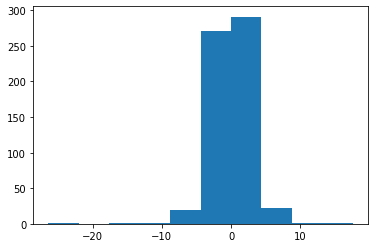

In [ ]:
plt.hist(y_train)

We are going to discretize the histogram of the returns in the y_train in three classes.

In [ ]:
# We take the values of the returns in the y_train to compute the lower and higher bounds
lower_bound = np.percentile(y_train, 35)
higher_bound = np.percentile(y_train, 65)

In [ ]:
list_discrete = []
for i in y_train:
  if i<lower_bound:
    list_discrete.append(0)
  if i>lower_bound and i<higher_bound:
    list_discrete.append(1)
  if i>higher_bound:
    list_discrete.append(2)   

In [ ]:
y_train = pd.Series(list_discrete)

In [ ]:
## We do the same for the y_test which represents the true values we are going to predict
list_discrete = []
for i in y_test:
  if i<lower_bound:
    list_discrete.append(0)
  if i>lower_bound and i<higher_bound:
    list_discrete.append(1)
  if i>higher_bound:
    list_discrete.append(2)

In [ ]:
y_test = pd.Series(list_discrete)

In [ ]:
y_train

0      1
1      0
2      1
3      2
4      1
      ..
604    2
605    2
606    0
607    2
608    2
Length: 609, dtype: int64

In [ ]:
y_test

0      2
1      0
2      0
3      2
4      0
      ..
154    1
155    2
156    1
157    2
158    1
Length: 159, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_test.shape

(159,)

In [ ]:
y_pred = KNN_Classifier.predict(x_test)
y_pred.shape

(159,)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print(balanced_accuracy_score(y_test, y_pred))
# balanced_accuracy_score Lag1/2/3/4/5 Volume avec aroon 0.32383512544802867 #sans aroon 0.33465106472696604
# balanced_accuracy_score Lag1/2 Volume avec aroon 0.34121863799283153 sans aroon 0.30919249420198186 

0.34121863799283153


In [766]:
res_meta = [0.30919249420198186, 0.34121863799283153, 0.33465106472696604, 0.32383512544802867]

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

max_depth = [2,3,5,8,10,12,15]
learning_rates = np.logspace(-5,-0.1,num=6)
max_iter=[100,200,300,500]
param_grid = {'max_depth': max_depth, 'learning_rate':learning_rates, 'max_iter':max_iter}

cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0)

grid = GridSearchCV(HistGradientBoostingClassifier(), param_grid=param_grid, cv=cv, n_jobs=-1)

grid.fit(x_train, y_train)
y_pred_hist = grid.predict(x_test)


In [ ]:
print(balanced_accuracy_score(y_test, y_pred_hist))
# balanced_accuracy_score Lag1/2/3/4/5 Volume avec aroon 0.33068732869491885 #sans aroon 0.32222222222222224
#  balanced_accuracy_score Lag1/2 Volume avec aroon 0.32973856209150326 sans aroon 0.2950031625553447

0.32973856209150326


In [777]:
res_meta_gb= [0.32973856209150326,0.2950031625553447, 0.33068732869491885, 0.32222222222222224 ]

**BNP PARIBAS**

In [ ]:
# Here We are getting BNP financial information
# We need to pass BNP.PA as argument for that
ticker_list=["META","BNP.PA","BABA","2222.SR","FCAU.VI"]
#"GAZP.ME" supp because of lack of data 
dict_df={}
for i in ticker_list: 
  tick = yf.Ticker(i)
  df=tick.history(start="2019-12-15")
  df1 = df.drop(["Dividends","Stock Splits"],axis=1)
  df1["Mid"] = (df1["High"] + df1["Low"])/2
  df1["return"]=df1["Close"].pct_change() * 100
 
  dict_df[i]=df1
dict_df["BNP.PA"]

,Open,High,Low,Close,Volume,Mid,return
Date,,,,,,,
2019-12-16 00:00:00+01:00,41.474043,42.138641,41.434484,42.091171,3792646,41.786562,NaN
2019-12-17 00:00:00+01:00,41.932935,42.067435,41.576900,41.996231,3446801,41.822167,-0.225558
2019-12-18 00:00:00+01:00,41.853818,42.225674,41.798435,42.146557,3057803,42.012055,0.357951
2019-12-19 00:00:00+01:00,42.249409,42.447206,42.027875,42.336437,2821488,42.237540,0.450524
2019-12-20 00:00:00+01:00,42.249410,42.573796,42.217761,42.375999,8333270,42.395779,0.093447
...,...,...,...,...,...,...,...
2023-01-09 00:00:00+01:00,59.250000,59.430000,58.680000,59.020000,2782877,59.055000,-0.152259
2023-01-10 00:00:00+01:00,58.700001,58.740002,58.080002,58.349998,2572775,58.410002,-1.135212
2023-01-11 00:00:00+01:00,58.529999,59.040001,58.189999,58.599998,2443551,58.615000,0.428449


[*********************100%***********************]  1 of 1 completed


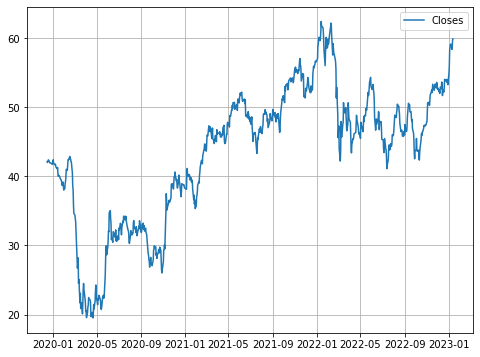

In [ ]:
from pandas_datareader import data as pdr
yf.pdr_override()

# Download META data for the past month
df = pdr.get_data_yahoo("BNP.PA")

closes = dict_df["BNP.PA"]["Close"]
returns = dict_df["BNP.PA"]["return"][1:]

fig, ax = plt.subplots(figsize =(8,6))
ax.plot(closes, label="Closes")

ax.legend()
plt.grid()
plt.show()

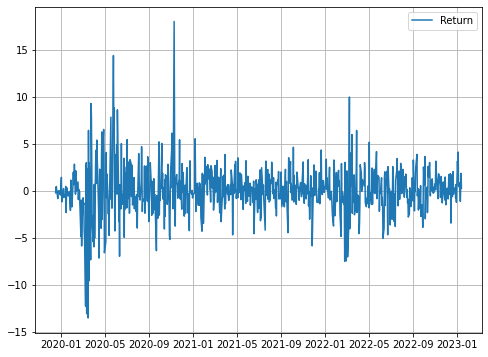

In [ ]:
fig, ax = plt.subplots(figsize =(8,6))
ax.plot(returns, label="Return")

ax.legend()
plt.grid()
plt.show()

In [ ]:
df = dict_df["BNP.PA"]['Close'].pct_change() * 100
df

Date
2019-12-16 00:00:00+01:00         NaN
2019-12-17 00:00:00+01:00   -0.225558
2019-12-18 00:00:00+01:00    0.357951
2019-12-19 00:00:00+01:00    0.450524
2019-12-20 00:00:00+01:00    0.093447
                               ...   
2023-01-09 00:00:00+01:00   -0.152259
2023-01-10 00:00:00+01:00   -1.135212
2023-01-11 00:00:00+01:00    0.428449
2023-01-12 00:00:00+01:00    1.843007
2023-01-13 00:00:00+01:00    0.301609
Name: Close, Length: 793, dtype: float64

In [ ]:
df = df.rename('Today')

In [ ]:
df = df.reset_index()
for i in range(1,6):
  df['Lag ' + str(i) ] = df['Today'].shift(i)
df 
df['Volume'] = dict_df['BNP.PA'].Volume.shift(1).values/1000_000_000
df = df.dropna()
df['Direction'] =  [1 if i > 0 else 0 for i in df['Today']]
df = sm.add_constant(df)
aroon = talib.AROONOSC(dict_df['BNP.PA']['High'], dict_df['BNP.PA']['Low'], timeperiod = 7)

<ipython-input-576-dde2023ef220>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Direction'] =  [1 if i > 0 else 0 for i in df['Today']]
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#aroon = aroon[7:]
aroon

Date
2019-12-25 00:00:00+01:00     57.142857
2019-12-27 00:00:00+01:00     42.857143
2019-12-30 00:00:00+01:00    -71.428571
2019-12-31 00:00:00+01:00    -85.714286
2020-01-02 00:00:00+01:00     14.285714
                                ...    
2023-01-09 00:00:00+01:00     85.714286
2023-01-10 00:00:00+01:00     85.714286
2023-01-11 00:00:00+01:00     71.428571
2023-01-12 00:00:00+01:00    100.000000
2023-01-13 00:00:00+01:00    100.000000
Length: 786, dtype: float64

In [ ]:
#df = df[1:]
df

,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
7,1.0,2019-12-25 00:00:00+01:00,0.000000,-0.244778,-0.840177,0.093447,0.450524,0.357951,0.000388,0
8,1.0,2019-12-27 00:00:00+01:00,-0.018875,0.000000,-0.244778,-0.840177,0.093447,0.450524,0.000000,0
9,1.0,2019-12-30 00:00:00+01:00,-0.453085,-0.018875,0.000000,-0.244778,-0.840177,0.093447,0.002272,0
10,1.0,2019-12-31 00:00:00+01:00,0.189650,-0.453085,-0.018875,0.000000,-0.244778,-0.840177,0.001669,1
11,1.0,2020-01-02 00:00:00+01:00,1.419641,0.189650,-0.453085,-0.018875,0.000000,-0.244778,0.000576,1
...,...,...,...,...,...,...,...,...,...,...
788,1.0,2023-01-09 00:00:00+01:00,-0.152259,0.853097,0.514490,4.106415,1.966135,3.154930,0.002907,0
789,1.0,2023-01-10 00:00:00+01:00,-1.135212,-0.152259,0.853097,0.514490,4.106415,1.966135,0.002783,0
790,1.0,2023-01-11 00:00:00+01:00,0.428449,-1.135212,-0.152259,0.853097,0.514490,4.106415,0.002573,1
791,1.0,2023-01-12 00:00:00+01:00,1.843007,0.428449,-1.135212,-0.152259,0.853097,0.514490,0.002444,1


In [ ]:
df['aroon'] = np.array(aroon.values)
#df = df[2:]
df.index = np.arange(len(df))
#np.array(aroon.values)

<ipython-input-582-cc66b9490029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aroon'] = np.array(aroon.values)


In [ ]:
df

,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction,aroon
0,1.0,2019-12-25 00:00:00+01:00,0.000000,-0.244778,-0.840177,0.093447,0.450524,0.357951,0.000388,0,57.142857
1,1.0,2019-12-27 00:00:00+01:00,-0.018875,0.000000,-0.244778,-0.840177,0.093447,0.450524,0.000000,0,42.857143
2,1.0,2019-12-30 00:00:00+01:00,-0.453085,-0.018875,0.000000,-0.244778,-0.840177,0.093447,0.002272,0,-71.428571
3,1.0,2019-12-31 00:00:00+01:00,0.189650,-0.453085,-0.018875,0.000000,-0.244778,-0.840177,0.001669,1,-85.714286
4,1.0,2020-01-02 00:00:00+01:00,1.419641,0.189650,-0.453085,-0.018875,0.000000,-0.244778,0.000576,1,14.285714
...,...,...,...,...,...,...,...,...,...,...,...
781,1.0,2023-01-09 00:00:00+01:00,-0.152259,0.853097,0.514490,4.106415,1.966135,3.154930,0.002907,0,85.714286
782,1.0,2023-01-10 00:00:00+01:00,-1.135212,-0.152259,0.853097,0.514490,4.106415,1.966135,0.002783,0,85.714286
783,1.0,2023-01-11 00:00:00+01:00,0.428449,-1.135212,-0.152259,0.853097,0.514490,4.106415,0.002573,1,71.428571
784,1.0,2023-01-12 00:00:00+01:00,1.843007,0.428449,-1.135212,-0.152259,0.853097,0.514490,0.002444,1,100.000000


In [ ]:
x_train = df[:609][['Today', 'Lag 1', 'Lag 2','Volume']]
#x_train = df[:609][['Today', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume','aroon']]
y_train = df[1:610]['Today']
x_test = df[609:-1][['Today', 'Lag 1', 'Lag 2', 'Volume']]
y_test = df[610:]['Today']

In [ ]:
# We take the values of the returns in the y_train to compute the lower and higher bounds
lower_bound = np.percentile(y_train, 35)
higher_bound = np.percentile(y_train, 65)

list_discrete = []
for i in y_train:
  if i<lower_bound:
    list_discrete.append(0)
  if i>lower_bound and i<higher_bound:
    list_discrete.append(1)
  if i>higher_bound:
    list_discrete.append(2) 

y_train = pd.Series(list_discrete) 

## We do the same for the y_test which represents the true values we are going to predict
list_discrete = []
for i in y_test:
  if i<lower_bound:
    list_discrete.append(0)
  if i>lower_bound and i<higher_bound:
    list_discrete.append(1)
  if i>higher_bound:
    list_discrete.append(2)

y_test = pd.Series(list_discrete)

from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(x_train, y_train)

y_pred = KNN_Classifier.predict(x_test)

from sklearn.metrics import balanced_accuracy_score

print(balanced_accuracy_score(y_test, y_pred))
# balanced_accuracy_score Lag1/2/3/4/5 Volume sans aroon 0.40246277722558554 avec aroon 0.3284991415921207
# balanced_accuracy_score Lag1/2 Volume sans aroon 0.33834824252281553 avec aroon 0.3467214842926418

0.33834824252281553


In [767]:
res_bnp = [0.33834824252281553,0.3467214842926418,0.40246277722558554, 0.3284991415921207  ]

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

max_depth = [2,3,5,8,10,12,15]
learning_rates = np.logspace(-5,-0.1,num=6)
max_iter=[100,200,300,500]
param_grid = {'max_depth': max_depth, 'learning_rate':learning_rates, 'max_iter':max_iter}

cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0)

grid = GridSearchCV(HistGradientBoostingClassifier(), param_grid=param_grid, cv=cv, n_jobs=-1)

grid.fit(x_train, y_train)
y_pred_hist = grid.predict(x_test)

In [ ]:
print(balanced_accuracy_score(y_test, y_pred_hist))
# balanced_accuracy_score Lag1/2/3/4/5 Volume sans aroon 0.33495477043864136  avec aroon 0.33611437406503825
# balanced_accuracy_score Lag1/2 Volume sans aroon  0.30617551680170274 avec aroon 0.3902141501761995

0.30617551680170274


In [776]:
res_bnp_gb = [0.30617551680170274,0.3902141501761995, 0.33495477043864136,0.33611437406503825  ]

**BABA**

In [ ]:
# Here We are getting Facebook financial information
# We need to pass FB as argument for that
ticker_list=["META","BNP.PA","BABA","2222.SR","FCAU.VI"]
#"GAZP.ME" supp because of lack of data 
dict_df={}
for i in ticker_list: 
  tick = yf.Ticker(i)
  df=tick.history(start="2019-12-15")
  df1 = df.drop(["Dividends","Stock Splits"],axis=1)
  df1["Mid"] = (df1["High"] + df1["Low"])/2
  df1["return"]=df1["Close"].pct_change() * 100
 
  dict_df[i]=df1
dict_df["BABA"]

,Open,High,Low,Close,Volume,Mid,return
Date,,,,,,,
2019-12-16 00:00:00-05:00,206.330002,209.149994,206.190002,206.970001,16734300,207.669998,NaN
2019-12-17 00:00:00-05:00,208.690002,208.869995,206.820007,208.179993,11287600,207.845001,0.584622
2019-12-18 00:00:00-05:00,208.529999,210.050003,208.039993,210.000000,13481800,209.044998,0.874247
2019-12-19 00:00:00-05:00,209.610001,211.369995,209.229996,210.130005,12167300,210.299995,0.061907
2019-12-20 00:00:00-05:00,211.350006,213.979996,210.419998,212.250000,26670000,212.199997,1.008897
...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,111.989998,113.110001,108.120003,110.830002,42085300,110.615002,3.193669
2023-01-10 00:00:00-05:00,112.970001,115.480003,111.209999,114.879997,33478600,113.345001,3.654241
2023-01-11 00:00:00-05:00,114.599998,115.209999,112.309998,115.019997,22804400,113.759998,0.121866


[*********************100%***********************]  1 of 1 completed


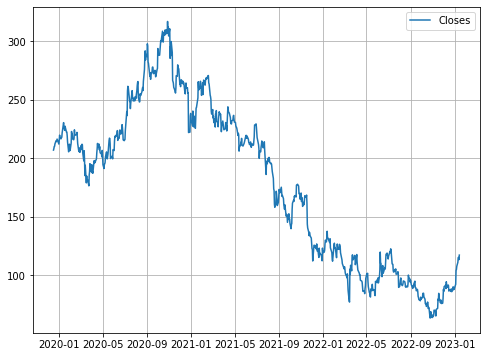

In [ ]:
from pandas_datareader import data as pdr
yf.pdr_override()

# Download META data for the past month
df = pdr.get_data_yahoo("BABA")

closes = dict_df["BABA"]["Close"]
returns = dict_df["BABA"]["return"][1:]

fig, ax = plt.subplots(figsize =(8,6))
ax.plot(closes, label="Closes")

ax.legend()
plt.grid()
plt.show()

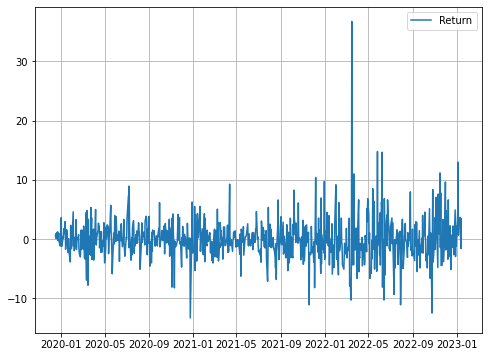

In [ ]:
fig, ax = plt.subplots(figsize =(8,6))
ax.plot(returns, label="Return")

ax.legend()
plt.grid()
plt.show()

In [ ]:
df = dict_df["BABA"]['Close'].pct_change() * 100
df

Date
2019-12-16 00:00:00-05:00         NaN
2019-12-17 00:00:00-05:00    0.584622
2019-12-18 00:00:00-05:00    0.874247
2019-12-19 00:00:00-05:00    0.061907
2019-12-20 00:00:00-05:00    1.008897
                               ...   
2023-01-09 00:00:00-05:00    3.193669
2023-01-10 00:00:00-05:00    3.654241
2023-01-11 00:00:00-05:00    0.121866
2023-01-12 00:00:00-05:00   -1.625800
2023-01-13 00:00:00-05:00    3.411401
Name: Close, Length: 776, dtype: float64

In [ ]:
df = df.rename('Today')

In [ ]:
df = df.reset_index()
for i in range(1,6):
  df['Lag ' + str(i) ] = df['Today'].shift(i)
df 
df['Volume'] = dict_df['BABA'].Volume.shift(1).values/1000_000_000
df = df.dropna()
df['Direction'] =  [1 if i > 0 else 0 for i in df['Today']]
df = sm.add_constant(df)
aroon = talib.AROONOSC(dict_df['BABA']['High'], dict_df['BABA']['Low'], timeperiod = 7)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#aroon = aroon[7:]
aroon

Date
2019-12-26 00:00:00-05:00    100.000000
2019-12-27 00:00:00-05:00    100.000000
2019-12-30 00:00:00-05:00     85.714286
2019-12-31 00:00:00-05:00     71.428571
2020-01-02 00:00:00-05:00    100.000000
                                ...    
2023-01-09 00:00:00-05:00    100.000000
2023-01-10 00:00:00-05:00    100.000000
2023-01-11 00:00:00-05:00     85.714286
2023-01-12 00:00:00-05:00     71.428571
2023-01-13 00:00:00-05:00    100.000000
Length: 769, dtype: float64

In [ ]:
#df = df[1:]
df

,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
7,1.0,2019-12-26 00:00:00-05:00,0.989457,-0.265329,1.215549,1.008897,0.061907,0.874247,0.005523,1
8,1.0,2019-12-27 00:00:00-05:00,-0.420558,0.989457,-0.265329,1.215549,1.008897,0.061907,0.006907,0
9,1.0,2019-12-30 00:00:00-05:00,-1.188099,-0.420558,0.989457,-0.265329,1.215549,1.008897,0.011674,0
10,1.0,2019-12-31 00:00:00-05:00,-0.380441,-1.188099,-0.420558,0.989457,-0.265329,1.215549,0.008733,0
11,1.0,2020-01-02 00:00:00-05:00,3.616218,-0.380441,-1.188099,-0.420558,0.989457,-0.265329,0.006774,1
...,...,...,...,...,...,...,...,...,...,...
771,1.0,2023-01-09 00:00:00-05:00,3.193669,2.696500,0.635107,12.981077,4.415946,-1.166836,0.021056,1
772,1.0,2023-01-10 00:00:00-05:00,3.654241,3.193669,2.696500,0.635107,12.981077,4.415946,0.042085,1
773,1.0,2023-01-11 00:00:00-05:00,0.121866,3.654241,3.193669,2.696500,0.635107,12.981077,0.033479,1
774,1.0,2023-01-12 00:00:00-05:00,-1.625800,0.121866,3.654241,3.193669,2.696500,0.635107,0.022804,0


In [ ]:
df['aroon'] = np.array(aroon.values)
#df = df[2:]
df.index = np.arange(len(df))
#np.array(aroon.values)

<ipython-input-618-cc66b9490029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aroon'] = np.array(aroon.values)


In [ ]:
df

,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction,aroon
0,1.0,2019-12-26 00:00:00-05:00,0.989457,-0.265329,1.215549,1.008897,0.061907,0.874247,0.005523,1,100.000000
1,1.0,2019-12-27 00:00:00-05:00,-0.420558,0.989457,-0.265329,1.215549,1.008897,0.061907,0.006907,0,100.000000
2,1.0,2019-12-30 00:00:00-05:00,-1.188099,-0.420558,0.989457,-0.265329,1.215549,1.008897,0.011674,0,85.714286
3,1.0,2019-12-31 00:00:00-05:00,-0.380441,-1.188099,-0.420558,0.989457,-0.265329,1.215549,0.008733,0,71.428571
4,1.0,2020-01-02 00:00:00-05:00,3.616218,-0.380441,-1.188099,-0.420558,0.989457,-0.265329,0.006774,1,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
764,1.0,2023-01-09 00:00:00-05:00,3.193669,2.696500,0.635107,12.981077,4.415946,-1.166836,0.021056,1,100.000000
765,1.0,2023-01-10 00:00:00-05:00,3.654241,3.193669,2.696500,0.635107,12.981077,4.415946,0.042085,1,100.000000
766,1.0,2023-01-11 00:00:00-05:00,0.121866,3.654241,3.193669,2.696500,0.635107,12.981077,0.033479,1,85.714286
767,1.0,2023-01-12 00:00:00-05:00,-1.625800,0.121866,3.654241,3.193669,2.696500,0.635107,0.022804,0,71.428571


In [ ]:
#x_train = df[:609][['Today', 'Lag 1', 'Lag 2' , 'Volume']]
x_train = df[:609][['Today', 'Lag 1', 'Lag 2' ,'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
y_train = df[1:610]['Today']
x_test = df[609:-1][['Today', 'Lag 1', 'Lag 2' ,'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
y_test = df[610:]['Today']

In [ ]:
# We take the values of the returns in the y_train to compute the lower and higher bounds
lower_bound = np.percentile(y_train, 35)
higher_bound = np.percentile(y_train, 65)

list_discrete = []
for i in y_train:
  if i<lower_bound:
    list_discrete.append(0)
  if i>lower_bound and i<higher_bound:
    list_discrete.append(1)
  if i>higher_bound:
    list_discrete.append(2) 

y_train = pd.Series(list_discrete) 

## We do the same for the y_test which represents the true values we are going to predict
list_discrete = []
for i in y_test:
  if i<lower_bound:
    list_discrete.append(0)
  if i>lower_bound and i<higher_bound:
    list_discrete.append(1)
  if i>higher_bound:
    list_discrete.append(2)

y_test = pd.Series(list_discrete)

from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(x_train, y_train)

y_pred = KNN_Classifier.predict(x_test)

from sklearn.metrics import balanced_accuracy_score

print(balanced_accuracy_score(y_test, y_pred))
# balanced_accuracy_score Lag1/2/3/4/5 Volume sans aroon 0.34467837314137123 avec aroon 0.3520626888748331
# balanced_accuracy_score Lag1/2 Volume sans aroon 0.2327741132295212 aroon 0.301657580594962

0.34467837314137123


In [768]:
res_baba = [0.2327741132295212,0.301657580594962,0.34467837314137123, 0.3520626888748331  ]

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

max_depth = [2,3,5,8,10,12,15]
learning_rates = np.logspace(-5,-0.1,num=6)
max_iter=[100,200,300,500]
param_grid = {'max_depth': max_depth, 'learning_rate':learning_rates, 'max_iter':max_iter}

cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0)

grid = GridSearchCV(HistGradientBoostingClassifier(), param_grid=param_grid, cv=cv, n_jobs=-1)

grid.fit(x_train, y_train)
y_pred_hist = grid.predict(x_test)

In [ ]:
print(balanced_accuracy_score(y_test, y_pred_hist))
# balanced_accuracy_score Lag1/2/3/4/5 Volume sans aroon  0.32489985241408387  avec aroon 0.3290714135116412
# balanced_accuracy_score Lag1/2 Volume sans aroon 0.28646225515295726 avec aroon 0.31041233697780185

0.32489985241408387


In [775]:
res_baba_gb = [0.28646225515295726,0.31041233697780185, 0.32489985241408387, 0.3290714135116412 ]

**2222.SR**

In [ ]:
# Here We are getting Facebook financial information
# We need to pass FB as argument for that
ticker_list=["META","BNP.PA","BABA","2222.SR","FCAU.VI"]
#"GAZP.ME" supp because of lack of data 
dict_df={}
for i in ticker_list: 
  tick = yf.Ticker(i)
  df=tick.history(start="2019-12-15")
  df1 = df.drop(["Dividends","Stock Splits"],axis=1)
  df1["Mid"] = (df1["High"] + df1["Low"])/2
  df1["return"]=df1["Close"].pct_change() * 100
 
  dict_df[i]=df1
dict_df["2222.SR"]

,Open,High,Low,Close,Volume,Mid,return
Date,,,,,,,
2019-12-15 00:00:00+03:00,27.425703,27.721397,27.203931,27.647472,98349281,27.462664,NaN
2019-12-16 00:00:00+03:00,27.721398,28.164939,27.721398,28.091017,105973907,27.943169,1.604285
2019-12-17 00:00:00+03:00,28.127978,28.201902,27.721399,27.906208,142672245,27.961651,-0.657893
2019-12-18 00:00:00+03:00,27.721395,27.795320,27.130005,27.130005,83822621,27.462662,-2.781471
2019-12-19 00:00:00+03:00,27.130008,27.166971,26.242924,26.242924,108120197,26.704947,-3.269742
...,...,...,...,...,...,...,...
2023-01-09 00:00:00+03:00,31.500000,31.850000,31.500000,31.700001,3813298,31.675000,0.634923
2023-01-10 00:00:00+03:00,31.750000,31.850000,31.650000,31.850000,4333029,31.750000,0.473185
2023-01-11 00:00:00+03:00,31.850000,31.850000,31.650000,31.850000,2634377,31.750000,0.000000


[*********************100%***********************]  1 of 1 completed


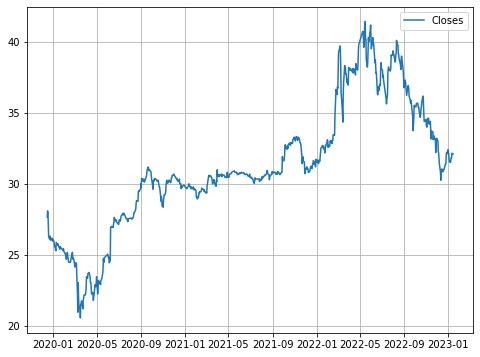

In [ ]:
from pandas_datareader import data as pdr
yf.pdr_override()

# Download META data for the past month
df = pdr.get_data_yahoo("2222.SR")

closes = dict_df["2222.SR"]["Close"]
returns = dict_df["2222.SR"]["return"][1:]

fig, ax = plt.subplots(figsize =(8,6))
ax.plot(closes, label="Closes")

ax.legend()
plt.grid()
plt.show()

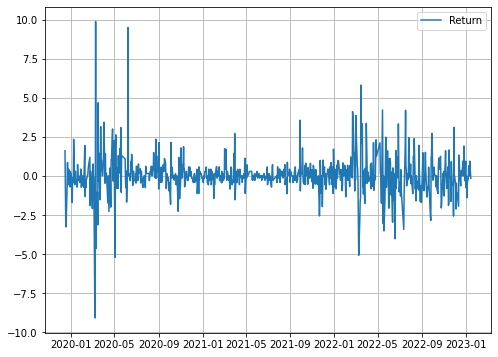

In [ ]:
fig, ax = plt.subplots(figsize =(8,6))
ax.plot(returns, label="Return")

ax.legend()
plt.grid()
plt.show()

In [ ]:
df = dict_df["2222.SR"]['Close'].pct_change() * 100
df

Date
2019-12-15 00:00:00+03:00         NaN
2019-12-16 00:00:00+03:00    1.604285
2019-12-17 00:00:00+03:00   -0.657893
2019-12-18 00:00:00+03:00   -2.781471
2019-12-19 00:00:00+03:00   -3.269742
                               ...   
2023-01-09 00:00:00+03:00    0.634923
2023-01-10 00:00:00+03:00    0.473185
2023-01-11 00:00:00+03:00    0.000000
2023-01-12 00:00:00+03:00    0.941919
2023-01-15 00:00:00+03:00   -0.155530
Name: Close, Length: 773, dtype: float64

In [ ]:
df = df.rename('Today')
df = df.reset_index()
for i in range(1,6):
  df['Lag ' + str(i) ] = df['Today'].shift(i)
df 
df['Volume'] = dict_df['2222.SR'].Volume.shift(1).values/1000_000_000
df = df.dropna()
df['Direction'] =  [1 if i > 0 else 0 for i in df['Today']]
df = sm.add_constant(df)
aroon = talib.AROONOSC(dict_df['2222.SR']['High'], dict_df['2222.SR']['Low'], timeperiod = 7)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#aroon = aroon[7:]
aroon

Date
2019-12-24 00:00:00+03:00   -42.857143
2019-12-25 00:00:00+03:00   -42.857143
2019-12-26 00:00:00+03:00   -42.857143
2019-12-29 00:00:00+03:00   -28.571429
2019-12-30 00:00:00+03:00   -14.285714
                               ...    
2023-01-09 00:00:00+03:00   -42.857143
2023-01-10 00:00:00+03:00   -42.857143
2023-01-11 00:00:00+03:00   -42.857143
2023-01-12 00:00:00+03:00    71.428571
2023-01-15 00:00:00+03:00    85.714286
Length: 766, dtype: float64

In [ ]:
#df = df[1:]
df

,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
7,1.0,2019-12-24 00:00:00+03:00,-0.561793,0.849859,-0.563383,-3.269742,-2.781471,-0.657893,0.035098,0
8,1.0,2019-12-25 00:00:00+03:00,-0.564982,-0.561793,0.849859,-0.563383,-3.269742,-2.781471,0.022184,0
9,1.0,2019-12-26 00:00:00+03:00,0.426129,-0.564982,-0.561793,0.849859,-0.563383,-3.269742,0.013573,1
10,1.0,2019-12-29 00:00:00+03:00,0.141460,0.426129,-0.564982,-0.561793,0.849859,-0.563383,0.013863,1
11,1.0,2019-12-30 00:00:00+03:00,-0.706227,0.141460,0.426129,-0.564982,-0.561793,0.849859,0.022967,0
...,...,...,...,...,...,...,...,...,...,...
768,1.0,2023-01-09 00:00:00+03:00,0.634923,-0.158476,-0.473191,-1.399691,0.000000,-0.771605,0.001886,1
769,1.0,2023-01-10 00:00:00+03:00,0.473185,0.634923,-0.158476,-0.473191,-1.399691,0.000000,0.003813,1
770,1.0,2023-01-11 00:00:00+03:00,0.000000,0.473185,0.634923,-0.158476,-0.473191,-1.399691,0.004333,0
771,1.0,2023-01-12 00:00:00+03:00,0.941919,0.000000,0.473185,0.634923,-0.158476,-0.473191,0.002634,1


In [ ]:
df['aroon'] = np.array(aroon.values)
#df = df[2:]
df.index = np.arange(len(df))
#np.array(aroon.values)

<ipython-input-656-cc66b9490029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aroon'] = np.array(aroon.values)


In [ ]:
df

,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction,aroon
0,1.0,2019-12-24 00:00:00+03:00,-0.561793,0.849859,-0.563383,-3.269742,-2.781471,-0.657893,0.035098,0,-42.857143
1,1.0,2019-12-25 00:00:00+03:00,-0.564982,-0.561793,0.849859,-0.563383,-3.269742,-2.781471,0.022184,0,-42.857143
2,1.0,2019-12-26 00:00:00+03:00,0.426129,-0.564982,-0.561793,0.849859,-0.563383,-3.269742,0.013573,1,-42.857143
3,1.0,2019-12-29 00:00:00+03:00,0.141460,0.426129,-0.564982,-0.561793,0.849859,-0.563383,0.013863,1,-28.571429
4,1.0,2019-12-30 00:00:00+03:00,-0.706227,0.141460,0.426129,-0.564982,-0.561793,0.849859,0.022967,0,-14.285714
...,...,...,...,...,...,...,...,...,...,...,...
761,1.0,2023-01-09 00:00:00+03:00,0.634923,-0.158476,-0.473191,-1.399691,0.000000,-0.771605,0.001886,1,-42.857143
762,1.0,2023-01-10 00:00:00+03:00,0.473185,0.634923,-0.158476,-0.473191,-1.399691,0.000000,0.003813,1,-42.857143
763,1.0,2023-01-11 00:00:00+03:00,0.000000,0.473185,0.634923,-0.158476,-0.473191,-1.399691,0.004333,0,-42.857143
764,1.0,2023-01-12 00:00:00+03:00,0.941919,0.000000,0.473185,0.634923,-0.158476,-0.473191,0.002634,1,71.428571


In [ ]:
x_train = df[:609][['Today', 'Lag 1', 'Lag 2', 'Volume']]
#['Today', 'Lag 1', 'Lag 2' ,'Lag 3', 'Lag 4', 'Lag 5', 'Volume','aroon']
y_train = df[1:610]['Today']
x_test = df[609:-1][['Today', 'Lag 1', 'Lag 2' ,'Volume']]
y_test = df[610:]['Today']

In [ ]:
# We take the values of the returns in the y_train to compute the lower and higher bounds
lower_bound = np.percentile(y_train, 35)
higher_bound = np.percentile(y_train, 65)

list_discrete = []
for i in y_train:
  if i<lower_bound:
    list_discrete.append(0)
  if i>lower_bound and i<higher_bound:
    list_discrete.append(1)
  if i>higher_bound:
    list_discrete.append(2) 

y_train = pd.Series(list_discrete) 

## We do the same for the y_test which represents the true values we are going to predict
list_discrete = []
for i in y_test:
  if i<lower_bound:
    list_discrete.append(0)
  if i>lower_bound and i<higher_bound:
    list_discrete.append(1)
  if i>higher_bound:
    list_discrete.append(2)

y_test = pd.Series(list_discrete)

from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(x_train, y_train)

y_pred = KNN_Classifier.predict(x_test)

from sklearn.metrics import balanced_accuracy_score

print(balanced_accuracy_score(y_test, y_pred))
# balanced_accuracy_score Lag1/2/3/4/5 Volume sans aroon 0.35222701882003693 avec aroon 0.4372825951482602
# balanced_accuracy_score Lag1/2 Volume sans aroon 0.340165652582798 avec aroon 0.3908953397464224

0.340165652582798


In [769]:
res_2222 = [0.340165652582798,0.3908953397464224, 0.35222701882003693, 0.4372825951482602]

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

max_depth = [2,3,5,8,10,12,15]
learning_rates = np.logspace(-5,-0.1,num=6)
max_iter=[100,200,300,500]
param_grid = {'max_depth': max_depth, 'learning_rate':learning_rates, 'max_iter':max_iter}

cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0)

grid = GridSearchCV(HistGradientBoostingClassifier(), param_grid=param_grid, cv=cv, n_jobs=-1)

grid.fit(x_train, y_train)
y_pred_hist = grid.predict(x_test)

In [ ]:
print(balanced_accuracy_score(y_test, y_pred_hist))
# balanced_accuracy_score Lag1/2/3/4/5 Volume sans aroon 0.3459923858730752  avec aroon 0.3306734876553701
# balanced_accuracy_score Lag1/2 Volume sans aroon 0.3490261395696659 avec aroon 0.3281751022581778

0.3490261395696659


In [774]:
res_2222_gb = [0.3490261395696659,0.3281751022581778,  0.3459923858730752,0.3306734876553701 ]

**FCAU.VI**

In [ ]:
# Here We are getting Facebook financial information
# We need to pass FB as argument for that
ticker_list=["META","BNP.PA","BABA","2222.SR","FCAU.VI"]
#"GAZP.ME" supp because of lack of data 
dict_df={}
for i in ticker_list: 
  tick = yf.Ticker(i)
  df=tick.history(start="2019-12-15")
  df1 = df.drop(["Dividends","Stock Splits"],axis=1)
  df1["Mid"] = (df1["High"] + df1["Low"])/2
  df1["return"]=df1["Close"].pct_change() * 100
 
  dict_df[i]=df1
dict_df["FCAU.VI"]

,Open,High,Low,Close,Volume,Mid,return
Date,,,,,,,
2019-12-16 00:00:00+01:00,9.550697,9.562046,9.550697,9.562046,0,9.556371,NaN
2019-12-17 00:00:00+01:00,9.583328,9.655682,9.583328,9.645750,1688,9.619505,0.875377
2019-12-18 00:00:00+01:00,9.747897,9.747897,9.655682,9.661356,2923,9.701789,0.161791
2019-12-19 00:00:00+01:00,9.719523,9.719523,9.654263,9.654263,0,9.686893,-0.073421
2019-12-20 00:00:00+01:00,9.698242,9.698242,9.682636,9.682636,0,9.690439,0.293898
...,...,...,...,...,...,...,...
2023-01-09 00:00:00+01:00,14.550000,14.570000,14.550000,14.570000,0,14.560000,0.956205
2023-01-10 00:00:00+01:00,14.560000,14.716000,14.560000,14.716000,80,14.638000,1.002058
2023-01-11 00:00:00+01:00,14.782000,14.782000,14.600000,14.600000,0,14.691000,-0.788252


[*********************100%***********************]  1 of 1 completed


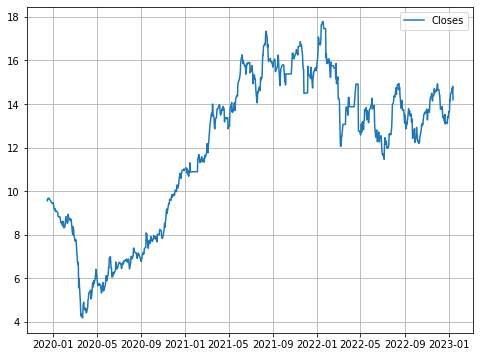

In [ ]:
from pandas_datareader import data as pdr
yf.pdr_override()

# Download META data for the past month
df = pdr.get_data_yahoo("FCAU.VI")

closes = dict_df["FCAU.VI"]["Close"]
returns = dict_df["FCAU.VI"]["return"][1:]

fig, ax = plt.subplots(figsize =(8,6))
ax.plot(closes, label="Closes")

ax.legend()
plt.grid()
plt.show()

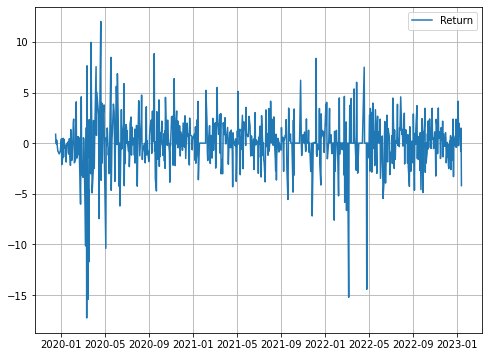

In [ ]:
fig, ax = plt.subplots(figsize =(8,6))
ax.plot(returns, label="Return")

ax.legend()
plt.grid()
plt.show()

In [ ]:
df = dict_df["FCAU.VI"]['Close'].pct_change() * 100
df

Date
2019-12-16 00:00:00+01:00         NaN
2019-12-17 00:00:00+01:00    0.875377
2019-12-18 00:00:00+01:00    0.161791
2019-12-19 00:00:00+01:00   -0.073421
2019-12-20 00:00:00+01:00    0.293898
                               ...   
2023-01-09 00:00:00+01:00    0.956205
2023-01-10 00:00:00+01:00    1.002058
2023-01-11 00:00:00+01:00   -0.788252
2023-01-12 00:00:00+01:00    1.479449
2023-01-13 00:00:00+01:00   -4.198162
Name: Close, Length: 780, dtype: float64

In [ ]:
df = df.rename('Today')
df = df.reset_index()
for i in range(1,6):
  df['Lag ' + str(i) ] = df['Today'].shift(i)
df 
df['Volume'] = dict_df['FCAU.VI'].Volume.shift(1).values/1000_000_000
df = df.dropna()
df['Direction'] =  [1 if i > 0 else 0 for i in df['Today']]
df = sm.add_constant(df)
aroon = talib.AROONOSC(dict_df['FCAU.VI']['High'], dict_df['FCAU.VI']['Low'], timeperiod = 7)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#aroon = aroon[7:]
aroon

Date
2019-12-30 00:00:00+01:00    -71.428571
2020-01-02 00:00:00+01:00    -85.714286
2020-01-03 00:00:00+01:00   -100.000000
2020-01-06 00:00:00+01:00   -100.000000
2020-01-07 00:00:00+01:00    -85.714286
                                ...    
2023-01-09 00:00:00+01:00    100.000000
2023-01-10 00:00:00+01:00    100.000000
2023-01-11 00:00:00+01:00     85.714286
2023-01-12 00:00:00+01:00    100.000000
2023-01-13 00:00:00+01:00     85.714286
Length: 773, dtype: float64

In [ ]:
#df = df[1:]
df

,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
7,1.0,2019-12-30 00:00:00+01:00,-0.776013,-1.063041,-0.761904,0.293898,-0.073421,0.161791,8.440000e-07,0
8,1.0,2020-01-02 00:00:00+01:00,0.421124,-0.776013,-1.063041,-0.761904,0.293898,-0.073421,0.000000e+00,1
9,1.0,2020-01-03 00:00:00+01:00,-2.126699,0.421124,-0.776013,-1.063041,-0.761904,0.293898,0.000000e+00,0
10,1.0,2020-01-06 00:00:00+01:00,-1.331297,-2.126699,0.421124,-0.776013,-1.063041,-0.761904,1.494000e-06,0
11,1.0,2020-01-07 00:00:00+01:00,0.480768,-1.331297,-2.126699,0.421124,-0.776013,-1.063041,9.560000e-07,1
...,...,...,...,...,...,...,...,...,...,...
775,1.0,2023-01-09 00:00:00+01:00,0.956205,1.964108,-0.239635,4.139754,-0.248941,2.245847,0.000000e+00,1
776,1.0,2023-01-10 00:00:00+01:00,1.002058,0.956205,1.964108,-0.239635,4.139754,-0.248941,0.000000e+00,1
777,1.0,2023-01-11 00:00:00+01:00,-0.788252,1.002058,0.956205,1.964108,-0.239635,4.139754,8.000000e-08,0
778,1.0,2023-01-12 00:00:00+01:00,1.479449,-0.788252,1.002058,0.956205,1.964108,-0.239635,0.000000e+00,1


In [ ]:
df['aroon'] = np.array(aroon.values)
#df = df[2:]
df.index = np.arange(len(df))
#np.array(aroon.values)
df

<ipython-input-700-bd9d9b7aa44a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aroon'] = np.array(aroon.values)


,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction,aroon
0,1.0,2019-12-30 00:00:00+01:00,-0.776013,-1.063041,-0.761904,0.293898,-0.073421,0.161791,8.440000e-07,0,-71.428571
1,1.0,2020-01-02 00:00:00+01:00,0.421124,-0.776013,-1.063041,-0.761904,0.293898,-0.073421,0.000000e+00,1,-85.714286
2,1.0,2020-01-03 00:00:00+01:00,-2.126699,0.421124,-0.776013,-1.063041,-0.761904,0.293898,0.000000e+00,0,-100.000000
3,1.0,2020-01-06 00:00:00+01:00,-1.331297,-2.126699,0.421124,-0.776013,-1.063041,-0.761904,1.494000e-06,0,-100.000000
4,1.0,2020-01-07 00:00:00+01:00,0.480768,-1.331297,-2.126699,0.421124,-0.776013,-1.063041,9.560000e-07,1,-85.714286
...,...,...,...,...,...,...,...,...,...,...,...
768,1.0,2023-01-09 00:00:00+01:00,0.956205,1.964108,-0.239635,4.139754,-0.248941,2.245847,0.000000e+00,1,100.000000
769,1.0,2023-01-10 00:00:00+01:00,1.002058,0.956205,1.964108,-0.239635,4.139754,-0.248941,0.000000e+00,1,100.000000
770,1.0,2023-01-11 00:00:00+01:00,-0.788252,1.002058,0.956205,1.964108,-0.239635,4.139754,8.000000e-08,0,85.714286
771,1.0,2023-01-12 00:00:00+01:00,1.479449,-0.788252,1.002058,0.956205,1.964108,-0.239635,0.000000e+00,1,100.000000


In [ ]:
x_train = df[:609][['Today', 'Lag 1','Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume','aroon']]
#x_train = df[:609][['Today', 'Lag 1','Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
y_train = df[1:610]['Today']
x_test = df[609:-1][['Today', 'Lag 1','Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume','aroon']]
y_test = df[610:]['Today']

In [ ]:
# We take the values of the returns in the y_train to compute the lower and higher bounds
lower_bound = np.percentile(y_train, 35)
higher_bound = np.percentile(y_train, 65)

list_discrete = []
for i in y_train:
  if i<lower_bound:
    list_discrete.append(0)
  if i>lower_bound and i<higher_bound:
    list_discrete.append(1)
  if i>higher_bound:
    list_discrete.append(2) 

y_train = pd.Series(list_discrete) 

## We do the same for the y_test which represents the true values we are going to predict
list_discrete = []
for i in y_test:
  if i<lower_bound:
    list_discrete.append(0)
  if i>lower_bound and i<higher_bound:
    list_discrete.append(1)
  if i>higher_bound:
    list_discrete.append(2)

y_test = pd.Series(list_discrete)

from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(x_train, y_train)

y_pred = KNN_Classifier.predict(x_test)

from sklearn.metrics import balanced_accuracy_score

print(balanced_accuracy_score(y_test, y_pred))
# balanced_accuracy_score Lag1/2/3/4/5 Volume sans aroon 0.25761815920398007 avec aroon 0.351601368159204
# balanced_accuracy_score Lag1/2 Volume sans aroon 0.25761815920398007 avec aroon 0.30830223880597013

0.3568097014925373


In [770]:
res_fcau = [0.25761815920398007,0.30830223880597013, 0.25761815920398007,0.351601368159204 ]

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

max_depth = [2,3,5,8,10,12,15]
learning_rates = np.logspace(-5,-0.1,num=6)
max_iter=[100,200,300,500]
param_grid = {'max_depth': max_depth, 'learning_rate':learning_rates, 'max_iter':max_iter}

cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0)

grid = GridSearchCV(HistGradientBoostingClassifier(), param_grid=param_grid, cv=cv, n_jobs=-1)

grid.fit(x_train, y_train)
y_pred_hist = grid.predict(x_test)

In [ ]:
print(balanced_accuracy_score(y_test, y_pred_hist))
# balanced_accuracy_score Lag1/2/3/4/5 Volume sans aroon  0.3308457711442786  avec aroon 0.30029539800995025
# balanced_accuracy_score Lag1/2 Volume sans aroon  0.34056281094527363 avec aroon 0.34600435323383083

0.30029539800995025


In [773]:
res_fcau_gb = [0.34056281094527363,0.34600435323383083, 0.3308457711442786, 0.30029539800995025 ]

**^GSPC**

In [ ]:
# Here We are getting Facebook financial information
# We need to pass FB as argument for that
ticker_list=["META","BNP.PA","BABA","2222.SR","FCAU.VI","^GSPC"]
#"GAZP.ME" supp because of lack of data 
dict_df={}
for i in ticker_list: 
  tick = yf.Ticker(i)
  df=tick.history(start="2019-12-15")
  df1 = df.drop(["Dividends","Stock Splits"],axis=1)
  df1["Mid"] = (df1["High"] + df1["Low"])/2
  df1["return"]=df1["Close"].pct_change() * 100
 
  dict_df[i]=df1
dict_df["^GSPC"]

,Open,High,Low,Close,Volume,Mid,return
Date,,,,,,,
2019-12-16 00:00:00-05:00,3183.629883,3197.709961,3183.629883,3191.449951,4070200000,3190.669922,NaN
2019-12-17 00:00:00-05:00,3195.399902,3198.219971,3191.030029,3192.520020,3842940000,3194.625000,0.033529
2019-12-18 00:00:00-05:00,3195.209961,3198.479980,3191.139893,3191.139893,4029950000,3194.809937,-0.043230
2019-12-19 00:00:00-05:00,3192.320068,3205.479980,3192.320068,3205.370117,3784360000,3198.900024,0.445929
2019-12-20 00:00:00-05:00,3223.330078,3225.649902,3216.030029,3221.219971,6457480000,3220.839966,0.494478
...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,3910.820068,3950.570068,3890.419922,3892.090088,4311770000,3920.494995,-0.076763
2023-01-10 00:00:00-05:00,3888.570068,3919.830078,3877.290039,3919.250000,3851030000,3898.560059,0.697823
2023-01-11 00:00:00-05:00,3932.350098,3970.070068,3928.540039,3969.610107,4303360000,3949.305054,1.284942


[*********************100%***********************]  1 of 1 completed


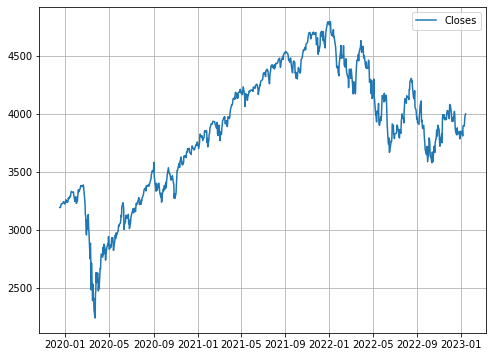

In [ ]:
from pandas_datareader import data as pdr
yf.pdr_override()

# Download META data for the past month
df = pdr.get_data_yahoo("^GSPC")

closes = dict_df["^GSPC"]["Close"]
returns = dict_df["^GSPC"]["return"][1:]

fig, ax = plt.subplots(figsize =(8,6))
ax.plot(closes, label="Closes")

ax.legend()
plt.grid()
plt.show()

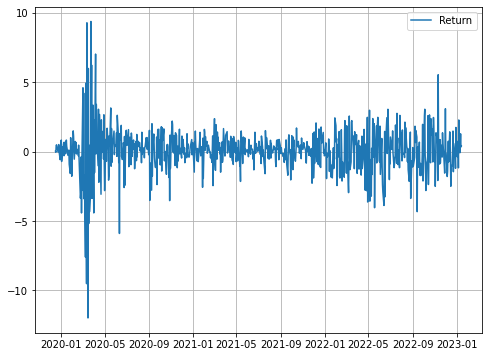

In [ ]:
fig, ax = plt.subplots(figsize =(8,6))
ax.plot(returns, label="Return")

ax.legend()
plt.grid()
plt.show()

In [ ]:
df = dict_df["^GSPC"]['Close'].pct_change() * 100
df

Date
2019-12-16 00:00:00-05:00         NaN
2019-12-17 00:00:00-05:00    0.033529
2019-12-18 00:00:00-05:00   -0.043230
2019-12-19 00:00:00-05:00    0.445929
2019-12-20 00:00:00-05:00    0.494478
                               ...   
2023-01-09 00:00:00-05:00   -0.076763
2023-01-10 00:00:00-05:00    0.697823
2023-01-11 00:00:00-05:00    1.284942
2023-01-12 00:00:00-05:00    0.341591
2023-01-13 00:00:00-05:00    0.399686
Name: Close, Length: 776, dtype: float64

In [ ]:
df = df.rename('Today')
df = df.reset_index()
for i in range(1,6):
  df['Lag ' + str(i) ] = df['Today'].shift(i)
df 
df['Volume'] = dict_df['^GSPC'].Volume.shift(1).values/1000_000_000
df = df.dropna()
df['Direction'] =  [1 if i > 0 else 0 for i in df['Today']]
df = sm.add_constant(df)
aroon = talib.AROONOSC(dict_df['^GSPC']['High'], dict_df['^GSPC']['Low'], timeperiod = 7)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#aroon = aroon[7:]
aroon

Date
2019-12-26 00:00:00-05:00    100.000000
2019-12-27 00:00:00-05:00    100.000000
2019-12-30 00:00:00-05:00     85.714286
2019-12-31 00:00:00-05:00     71.428571
2020-01-02 00:00:00-05:00     14.285714
                                ...    
2023-01-09 00:00:00-05:00    100.000000
2023-01-10 00:00:00-05:00     57.142857
2023-01-11 00:00:00-05:00     85.714286
2023-01-12 00:00:00-05:00    100.000000
2023-01-13 00:00:00-05:00     85.714286
Length: 769, dtype: float64

In [ ]:
#df = df[1:]
df

,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
7,1.0,2019-12-26 00:00:00-05:00,0.512817,-0.019545,0.086614,0.494478,0.445929,-0.043230,1.29653,1
8,1.0,2019-12-27 00:00:00-05:00,0.003398,0.512817,-0.019545,0.086614,0.494478,0.445929,2.16454,1
9,1.0,2019-12-30 00:00:00-05:00,-0.578082,0.003398,0.512817,-0.019545,0.086614,0.494478,2.42915,0
10,1.0,2019-12-31 00:00:00-05:00,0.294602,-0.578082,0.003398,0.512817,-0.019545,0.086614,3.02172,1
11,1.0,2020-01-02 00:00:00-05:00,0.837880,0.294602,-0.578082,0.003398,0.512817,-0.019545,2.89476,1
...,...,...,...,...,...,...,...,...,...,...
771,1.0,2023-01-09 00:00:00-05:00,-0.076763,2.284078,-1.164553,0.753897,-0.400055,-0.254074,3.92356,0
772,1.0,2023-01-10 00:00:00-05:00,0.697823,-0.076763,2.284078,-1.164553,0.753897,-0.400055,4.31177,1
773,1.0,2023-01-11 00:00:00-05:00,1.284942,0.697823,-0.076763,2.284078,-1.164553,0.753897,3.85103,1
774,1.0,2023-01-12 00:00:00-05:00,0.341591,1.284942,0.697823,-0.076763,2.284078,-1.164553,4.30336,1


In [ ]:
df['aroon'] = np.array(aroon.values)
#df = df[2:]
df.index = np.arange(len(df))
#np.array(aroon.values)
df

<ipython-input-740-bd9d9b7aa44a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aroon'] = np.array(aroon.values)


,const,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction,aroon
0,1.0,2019-12-26 00:00:00-05:00,0.512817,-0.019545,0.086614,0.494478,0.445929,-0.043230,1.29653,1,100.000000
1,1.0,2019-12-27 00:00:00-05:00,0.003398,0.512817,-0.019545,0.086614,0.494478,0.445929,2.16454,1,100.000000
2,1.0,2019-12-30 00:00:00-05:00,-0.578082,0.003398,0.512817,-0.019545,0.086614,0.494478,2.42915,0,85.714286
3,1.0,2019-12-31 00:00:00-05:00,0.294602,-0.578082,0.003398,0.512817,-0.019545,0.086614,3.02172,1,71.428571
4,1.0,2020-01-02 00:00:00-05:00,0.837880,0.294602,-0.578082,0.003398,0.512817,-0.019545,2.89476,1,14.285714
...,...,...,...,...,...,...,...,...,...,...,...
764,1.0,2023-01-09 00:00:00-05:00,-0.076763,2.284078,-1.164553,0.753897,-0.400055,-0.254074,3.92356,0,100.000000
765,1.0,2023-01-10 00:00:00-05:00,0.697823,-0.076763,2.284078,-1.164553,0.753897,-0.400055,4.31177,1,57.142857
766,1.0,2023-01-11 00:00:00-05:00,1.284942,0.697823,-0.076763,2.284078,-1.164553,0.753897,3.85103,1,85.714286
767,1.0,2023-01-12 00:00:00-05:00,0.341591,1.284942,0.697823,-0.076763,2.284078,-1.164553,4.30336,1,100.000000


In [ ]:
x_train = df[:609][['Today', 'Lag 1','Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume','aroon']]
#x_train = df[:609][['Today', 'Lag 1','Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
y_train = df[1:610]['Today']
x_test = df[609:-1][['Today', 'Lag 1','Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume','aroon']]
y_test = df[610:]['Today']

In [ ]:
# We take the values of the returns in the y_train to compute the lower and higher bounds
lower_bound = np.percentile(y_train, 35)
higher_bound = np.percentile(y_train, 65)

list_discrete = []
for i in y_train:
  if i<lower_bound:
    list_discrete.append(0)
  if i>lower_bound and i<higher_bound:
    list_discrete.append(1)
  if i>higher_bound:
    list_discrete.append(2) 

y_train = pd.Series(list_discrete) 

## We do the same for the y_test which represents the true values we are going to predict
list_discrete = []
for i in y_test:
  if i<lower_bound:
    list_discrete.append(0)
  if i>lower_bound and i<higher_bound:
    list_discrete.append(1)
  if i>higher_bound:
    list_discrete.append(2)

y_test = pd.Series(list_discrete)

from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(x_train, y_train)

y_pred = KNN_Classifier.predict(x_test)

from sklearn.metrics import balanced_accuracy_score

print(balanced_accuracy_score(y_test, y_pred))
# balanced_accuracy_score Lag1/2/3/4/5 Volume sans aroon 0.2691884360849878 avec aroon 0.36621386276558693
# balanced_accuracy_score Lag1/2 Volume sans aroon 0.2928039010797631 avec aroon 0.32975269940787183

0.36621386276558693


In [771]:
res_gspc = [0.2928039010797631,0.32975269940787183, 0.2691884360849878,  0.36621386276558693]

In [764]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

max_depth = [2,3,5,8,10,12,15]
learning_rates = np.logspace(-5,-0.1,num=6)
max_iter=[100,200,300,500]
param_grid = {'max_depth': max_depth, 'learning_rate':learning_rates, 'max_iter':max_iter}

cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0)

grid = GridSearchCV(HistGradientBoostingClassifier(), param_grid=param_grid, cv=cv, n_jobs=-1)

grid.fit(x_train, y_train)
y_pred_hist = grid.predict(x_test)

In [765]:
print(balanced_accuracy_score(y_test, y_pred_hist))
# balanced_accuracy_score Lag1/2/3/4/5 Volume sans aroon  0.3885196795541623  avec aroon 0.41074190177638453
# balanced_accuracy_score Lag1/2 Volume sans aroon  0.3334308603274121 avec aroon 0.39336816440264716

0.41074190177638453


In [772]:
res_gspc_gb = [0.3334308603274121,0.39336816440264716, 0.3885196795541623, 0.41074190177638453 ]

In [802]:
import pandas as pd

indexes = [" Lag 2, Volume et sans aroon ", " Lag 2, Volume et avec aroon ", "Lag 5, Volume et sans aroon", "Lag 5, Volume et avec aroon"]

data = {'META': res_meta, 'BABA': res_baba, 'BNP': res_bnp, '2222': res_2222, 'FCAU': res_fcau, 'GSPC': res_gspc}
df = pd.DataFrame(data, index=indexes)
print(df)


                                   META      BABA       BNP      2222  \
 Lag 2, Volume et sans aroon   0.309192  0.232774  0.338348  0.340166   
 Lag 2, Volume et avec aroon   0.341219  0.301658  0.346721  0.390895   
Lag 5, Volume et sans aroon    0.334651  0.344678  0.402463  0.352227   
Lag 5, Volume et avec aroon    0.323835  0.352063  0.328499  0.437283   

                                   FCAU      GSPC  
 Lag 2, Volume et sans aroon   0.257618  0.292804  
 Lag 2, Volume et avec aroon   0.308302  0.329753  
Lag 5, Volume et sans aroon    0.257618  0.269188  
Lag 5, Volume et avec aroon    0.351601  0.366214  


In [803]:
df.style.set_caption("Tableau des résultats")\
  .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]},
                    {'selector': 'td', 'props': [('text-align', 'center')]}])\
  .set_table_attributes('border="1" class="table"')

,META,BABA,BNP,2222,FCAU,GSPC
"Lag 2, Volume et sans aroon",0.309192,0.232774,0.338348,0.340166,0.257618,0.292804
"Lag 2, Volume et avec aroon",0.341219,0.301658,0.346721,0.390895,0.308302,0.329753
"Lag 5, Volume et sans aroon",0.334651,0.344678,0.402463,0.352227,0.257618,0.269188
"Lag 5, Volume et avec aroon",0.323835,0.352063,0.328499,0.437283,0.351601,0.366214


In [804]:
df = df.style.apply(lambda x: ['background: green' if x.max() == i else 'background: red' for i in x], axis=0)\
  .background_gradient()
df

,META,BABA,BNP,2222,FCAU,GSPC
"Lag 2, Volume et sans aroon",0.309192,0.232774,0.338348,0.340166,0.257618,0.292804
"Lag 2, Volume et avec aroon",0.341219,0.301658,0.346721,0.390895,0.308302,0.329753
"Lag 5, Volume et sans aroon",0.334651,0.344678,0.402463,0.352227,0.257618,0.269188
"Lag 5, Volume et avec aroon",0.323835,0.352063,0.328499,0.437283,0.351601,0.366214


In [798]:
import pandas as pd

indexes = [" Lag 2, Volume et sans aroon ", " Lag 2, Volume et avec aroon ", "Lag 5, Volume et sans aroon", "Lag 5, Volume et avec aroon"]

data = {'META': res_meta_gb, 'BABA': res_baba_gb, 'BNP': res_bnp_gb, '2222': res_2222_gb, 'FCAU': res_fcau_gb, 'GSPC': res_gspc_gb}
df = pd.DataFrame(data, index=indexes)
print(df)


                                   META      BABA       BNP      2222  \
 Lag 2, Volume et sans aroon   0.329739  0.286462  0.306176  0.349026   
 Lag 2, Volume et avec aroon   0.295003  0.310412  0.390214  0.328175   
Lag 5, Volume et sans aroon    0.330687  0.324900  0.334955  0.345992   
Lag 5, Volume et avec aroon    0.322222  0.329071  0.336114  0.330673   

                                   FCAU      GSPC  
 Lag 2, Volume et sans aroon   0.340563  0.333431  
 Lag 2, Volume et avec aroon   0.346004  0.393368  
Lag 5, Volume et sans aroon    0.330846  0.388520  
Lag 5, Volume et avec aroon    0.300295  0.410742  


In [799]:
df.style.set_caption("Tableau des résultats")\
  .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]},
                    {'selector': 'td', 'props': [('text-align', 'center')]}])\
  .set_table_attributes('border="1" class="table"')

,META,BABA,BNP,2222,FCAU,GSPC
"Lag 2, Volume et sans aroon",0.329739,0.286462,0.306176,0.349026,0.340563,0.333431
"Lag 2, Volume et avec aroon",0.295003,0.310412,0.390214,0.328175,0.346004,0.393368
"Lag 5, Volume et sans aroon",0.330687,0.324900,0.334955,0.345992,0.330846,0.388520
"Lag 5, Volume et avec aroon",0.322222,0.329071,0.336114,0.330673,0.300295,0.410742


In [800]:
df = df.style.apply(lambda x: ['background: green' if x.max() == i else 'background: red' for i in x], axis=0)\
  .background_gradient()
df

,META,BABA,BNP,2222,FCAU,GSPC
"Lag 2, Volume et sans aroon",0.329739,0.286462,0.306176,0.349026,0.340563,0.333431
"Lag 2, Volume et avec aroon",0.295003,0.310412,0.390214,0.328175,0.346004,0.393368
"Lag 5, Volume et sans aroon",0.330687,0.324900,0.334955,0.345992,0.330846,0.388520
"Lag 5, Volume et avec aroon",0.322222,0.329071,0.336114,0.330673,0.300295,0.410742


**THANK YOU FOR ALL THE COURSES AND YOUR ATTENTION**